In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
books=pd.read_csv('books.csv')
users=pd.read_csv('users.csv')
ratings=pd.read_csv('ratings.csv')

In [3]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [4]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
users.tail()

,User-ID,Location,Age
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.00
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN
278857,278858,"dublin, n/a, ireland",NaN


In [6]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [7]:
print(books.shape)
print(ratings.shape)
print(users.shape)

(271360, 8)
(1149780, 3)
(278858, 3)


In [8]:
books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [9]:
ratings.isna().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [10]:
users.isna().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [11]:
books.duplicated().sum()

0

In [12]:
users.duplicated().sum()

0

In [13]:
ratings.duplicated().sum()

0

### Exploratory Data Analysis

In [14]:
books.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271358,271360,271358,271360,271360,271357
unique,271360,242135,102022,202,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,13903,7535,2,2,2


In [15]:
ratings.describe()

,User-ID,Book-Rating
count,1149780.00,1149780.00
mean,140386.40,2.87
std,80562.28,3.85
min,2.00,0.00
25%,70345.00,0.00
50%,141010.00,0.00
75%,211028.00,7.00
max,278854.00,10.00


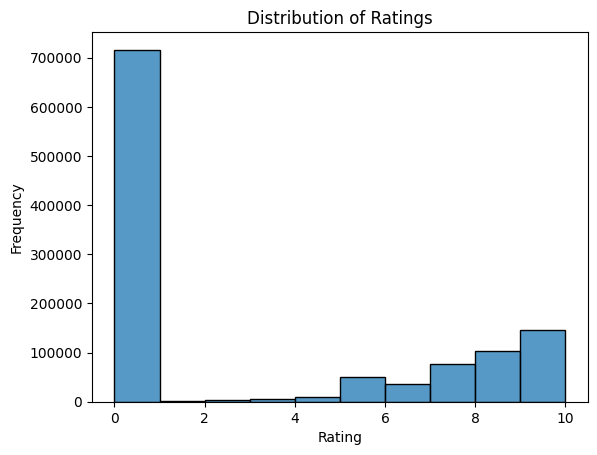

In [16]:
sns.histplot(ratings['Book-Rating'], bins=10, kde=False)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


In [17]:
ratings_per_book = ratings.groupby("ISBN")['Book-Rating'].mean()

In [18]:
ratings_per_book=pd.DataFrame(ratings_per_book.sort_values(ascending=False).head(10))

In [19]:
ratings_per_book

,Book-Rating
ISBN,
0874477050,10.00
561002010,10.00
0590939874,10.00
1570761914,10.00
56500624X,10.00
157076154X,10.00
1570761175,10.00
0373510365,10.00
0393092526,10.00


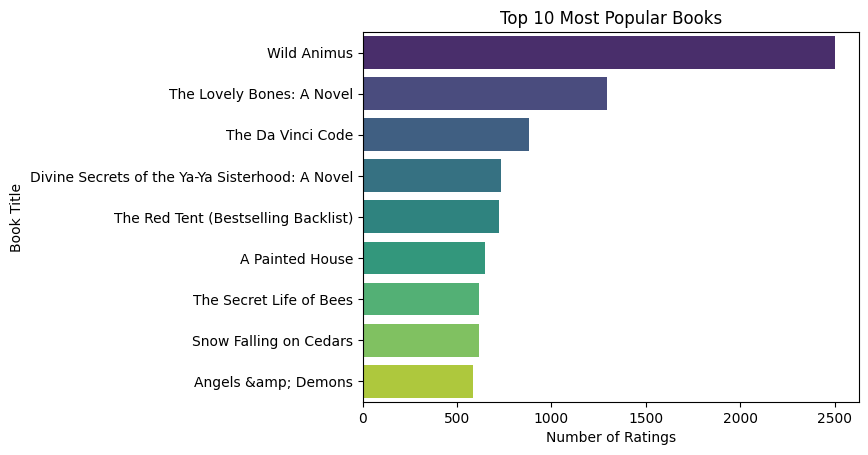

In [20]:
popular_books = ratings.groupby('ISBN').size().sort_values(ascending=False).head(10)
popular_books_df = books[books['ISBN'].isin(popular_books.index)]
id_to_title = books.set_index('ISBN')['Book-Title'].to_dict()
sns.barplot(x=popular_books.values, y=popular_books.index.map(id_to_title), palette='viridis')
plt.title('Top 10 Most Popular Books')
plt.xlabel('Number of Ratings')
plt.ylabel('Book Title')
plt.show()

## Popularity Based Recommendation System

In [21]:
merged_df=ratings.merge(books,on="ISBN")

In [23]:
popular_df1 = merged_df.groupby("Book-Title").agg(
    num_rating=("Book-Rating", "count"),
    avg_rating=("Book-Rating", "mean")
).reset_index()



In [24]:
popular_df1

,Book-Title,num_rating,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.25
1,Always Have Popsicles,1,0.00
2,Apple Magic (The Collector's series),1,0.00
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.00
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.00
...,...,...,...
241066,Ã?Â?lpiraten.,2,0.00
241067,Ã?Â?rger mit Produkt X. Roman.,4,5.25
241068,Ã?Â?sterlich leben.,1,7.00
241069,Ã?Â?stlich der Berge.,3,2.67


In [25]:
popular_df1=popular_df1[popular_df1["num_rating"]>=250].sort_values(by="avg_rating",ascending=False).head(50)

In [26]:
popular_df1=popular_df1.merge(books,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Year-Of-Publication','num_rating','avg_rating','Image-URL-M']]

## Collaborative Filtering Based Recommender System

In [27]:
X=merged_df.groupby('User-ID').count()['Book-Rating']>200

In [28]:
Req_Users=X[X].index

In [29]:
req_rating=merged_df[merged_df["User-ID"].isin(Req_Users)]

In [30]:
y=req_rating.groupby('Book-Title').count()['Book-Rating']>=50

In [31]:
req_books=y[y].index

In [32]:
Req_df=req_rating[req_rating["Book-Title"].isin(req_books)]

In [33]:
pt=Req_df.pivot_table(index="Book-Title",columns="User-ID",values="Book-Rating")

In [34]:
pt.fillna(0,inplace=True)

In [35]:
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1st to Die: A Novel,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,9.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2nd Chance,0.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4 Blondes,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
A Bend in the Road,0.00,0.00,7.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.00,0.00,0.00,7.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,9.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
You Belong To Me,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [36]:
from sklearn.metrics.pairwise import cosine_similarity

In [37]:
similarity_scores=cosine_similarity(pt)

In [38]:
similarity_scores.shape

(706, 706)

In [47]:
 def recommendation(book_name):
    index=np.where(pt.index==book_name)[0][0]
    similar_items=sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:6]
    data=[]
    for i in similar_items:
        item=[]
        temp_df=books[books['Book-Title']==pt.index[i[0]]]
        item.extend(temp_df.drop_duplicates("Book-Title")["Book-Title"])
        item.extend(temp_df.drop_duplicates("Book-Title")["Book-Author"])
        item.extend(temp_df.drop_duplicates("Book-Title")["Image-URL-M"])
        data.append(item)
    return data
    

In [49]:
recommendation("Zen and the Art of Motorcycle Maintenance: An Inquiry into Values")

703
[(392, 0.3319053449234021), (374, 0.26044578020460907), (324, 0.2505761682973869), (546, 0.24888166407144893), (19, 0.24716309460793429)]


[['Prodigal Summer',
  'Barbara Kingsolver',
  'http://images.amazon.com/images/P/0060199652.01.MZZZZZZZ.jpg'],
 ['Pet Sematary',
  'Stephen King',
  'http://images.amazon.com/images/P/0451162072.01.MZZZZZZZ.jpg'],
 ['Midnight',
  'Dean R. Koontz',
  'http://images.amazon.com/images/P/0425118703.01.MZZZZZZZ.jpg'],
 ["The Hitchhiker's Guide to the Galaxy",
  'Douglas Adams',
  'http://images.amazon.com/images/P/0671461494.01.MZZZZZZZ.jpg'],
 ['A Prayer for Owen Meany',
  'John Irving',
  'http://images.amazon.com/images/P/0345361792.01.MZZZZZZZ.jpg']]

In [50]:
books.drop_duplicates("Book-Title",inplace=True)

In [51]:
import pickle

In [52]:
pickle.dump(popular_df1,open('popular.pkl', 'wb'))
pickle.dump(pt,open('pt.pkl', 'wb'))
pickle.dump(books,open('books.pkl', 'wb'))
pickle.dump(similarity_scores,open('similarity_scores.pkl', 'wb'))